__NAME:__ <br> * Amrita Veshin [22122104] <br> * Atharva Vetal [22122109]

-------------------------------------------------------------------------------
# <center> Humour Detection Using NLP
-------------------------------------------------------------------------------
<br> __PROBLEM STATEMENT:__ <br>
The field of Natural Language Processing (NLP) has experienced a notable surge in interest in the domain of humour detection, aiming to computationally discern the nuanced aspects of humour in text. This research addresses the multifaceted challenge of understanding and identifying humour in written content, centring around jokes. The ultimate goal of this study is to advance our comprehension of humour detection using NLP techniques and provide practical solutions for applications that require the recognition of humour in text.

<br> __KEY OBJECTIVES:__ <br>
* __Exploration of Humour in Text Data:__ The primary objective of this research is to delve into the distinctive characteristics of humour, encompassing elements like wordplay, punctuation ratio, and POS tags ratio, by conducting an Exploratory Data Analysis (EDA) on a dataset of textual content classified as either humorous (jokes) or non-humorous (plain text).
* __Feature Engineering for Humour Identification:__ The study aims to develop effective feature engineering techniques, including Part-of-Speech (POS) tagging, tokenization, and punctuation ratio analysis, to gain insights into linguistic and structural attributes that distinguish humorous texts from non-humorous ones.
* __Visualizing Elements that Construct Humour:__ By constructing box plots and other visual representations, the research intends to depict the distribution of linguistic and structural features across humorous and non-humorous text categories, shedding light on the differences that contribute to humour identification.
* __Supervised Learning Models:__ Employing various supervised learning techniques, such as the Naive Bayes classifier, Random Forest, and advanced Pre-Trained Language Models like BERT, the study seeks to classify text as humorous or non-humorous, providing a systematic approach for automating humour detection.
* __Comparative Analysis of Models:__ The research will undertake a comprehensive comparative analysis of the performance of different models in humour classification, aiming to determine which techniques and architectures are most effective for identifying humour in text.


## Importing the Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
data = pd.read_csv('JokeDetectionDataset_classified.csv')


In [ ]:
data.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


##Exploratory Data Analysis (**EDA**)

SpaCy is a versatile and widely-used library for text analysis, enabling tasks like tokenization, word embedding, and word tagging (e.g., identifying verbs and adjectives). It plays a significant role in various aspects of natural language processing.

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

# We'll be using the smallest spacy pipeline
nlp = spacy.load('en_core_web_sm')

# Spacy explain is used for searching the meaning of the terms used in Spacy
spacy.explain('PROPN')

2023-11-06 15:39:04.056400: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 15:39:04.056458: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 15:39:04.056500: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 15:39:04.077952: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 15:39:06.300287: W tensorflow/compiler/

'proper noun'

### WordPlay Comparisons Between Humorous and Non-Humorous Texts

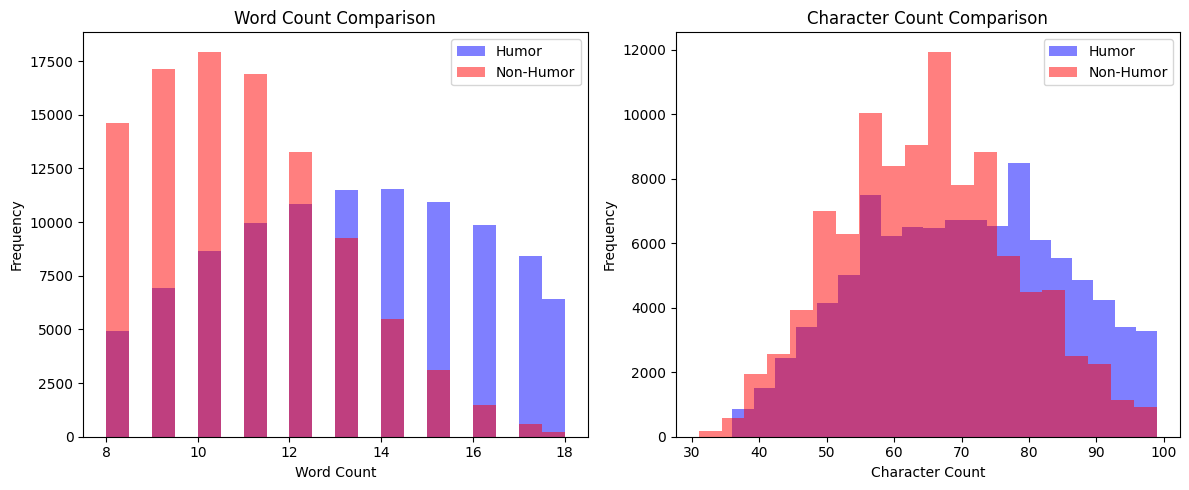

In [ ]:
import matplotlib.pyplot as plt
# Separate the data into humor and non-humor
humor_texts = data[data['humor'] == True]['text']
non_humor_texts = data[data['humor'] == False]['text']

# Calculate word counts for humor and non-humor texts
humor_word_counts = [len(text.split()) for text in humor_texts]
non_humor_word_counts = [len(text.split()) for text in non_humor_texts]

# Calculate character counts for humor and non-humor texts
humor_char_counts = [len(text) for text in humor_texts]
non_humor_char_counts = [len(text) for text in non_humor_texts]

# Create histograms to visualize word count comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(humor_word_counts, bins=20, alpha=0.5, label='Humor', color='blue')
plt.hist(non_humor_word_counts, bins=20, alpha=0.5, label='Non-Humor', color='red')
plt.title('Word Count Comparison')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()

# Create histograms to visualize character count comparison
plt.subplot(1, 2, 2)
plt.hist(humor_char_counts, bins=20, alpha=0.5, label='Humor', color='blue')
plt.hist(non_humor_char_counts, bins=20, alpha=0.5, label='Non-Humor', color='red')
plt.title('Character Count Comparison')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

* __From the above Word Count Comparison Graph, we can observe that the frequency of low-word-counted (8 to 12) non-humorous texts is quite higher than the humorous texts, which tend to have a higher word count comparatively.__ <br>
* __Taking a look at the character count comparison histogram, according to their frequencies, we observe that more no. of non-humorous texts have a lower character count as compared to the humorous texts, which tend to have a higher character count.__

###How Proportionate Is the Data? (With respect to the two categories, is it balanced or not)

<Axes: xlabel='humor', ylabel='amounts'>

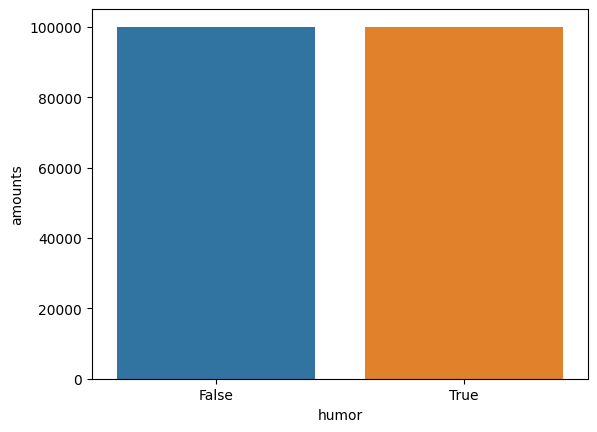

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='humor', y='amounts',
            data=pd.DataFrame(data.humor.value_counts()).reset_index().rename(columns={'humor':'amounts', 'index':'humor'}))

__We can see from the above plot that the data is balanced between the two categories humourous and non-humorous texts. Having an equal balance between jokes and non-jokes is crucial. Understanding the data proportion is vital because if it's significantly imbalanced, the model may become biased towards the category with more data, impacting its performance. In such cases, the model is more likely to favor the label with a larger training dataset due to a better understanding of the same.__

###How frequently does the question mark '?' symbol appear?

<Axes: xlabel='status', ylabel='question_mark'>

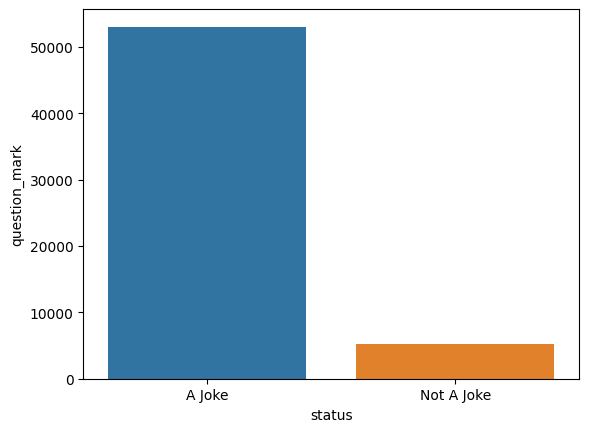

In [ ]:
qm_jokes = 0
qm_no_jokes = 0

for text in data[data.humor == False]['text']:
    if '?' in text:
        qm_no_jokes += 1

for text in data[data.humor == True]['text']:
    if '?' in text:
        qm_jokes += 1

df_qm = pd.DataFrame({'status':['A Joke', 'Not A Joke'], 'question_mark':[qm_jokes, qm_no_jokes]})
sns.barplot(x='status', y='question_mark', data=df_qm)


__From the above barplot, it's evident that the question mark is more prevalent in data labeled as jokes. Out of 100,000 data samples, over 50,000 contain a question mark, while those labeled as "_not_ajoke" consist of only around 5,000. Consequently, we can conclude that text classified as jokes has a greater tendency to include question marks.__

###Punctuations Ratio

In [ ]:
from spacy.matcher import Matcher
from tqdm.auto import tqdm

puncs = []
length = []
ratio = []

matcher = Matcher(nlp.vocab)
punc_pattern = [{'POS':'PUNCT'}]
matcher.add(1, [punc_pattern])

progress_bar = tqdm(range(len(data)))

for text in data['text']:
    doc = nlp(text)
    matches = matcher(doc)

    l_app = len(doc)
    p_app = len(matches)
    r_app = p_app / l_app

    length.append(l_app)
    puncs.append(p_app)
    ratio.append(r_app)

    progress_bar.update(1)

  0%|          | 0/200000 [00:00<?, ?it/s]

<Axes: xlabel='humor', ylabel='ratio'>

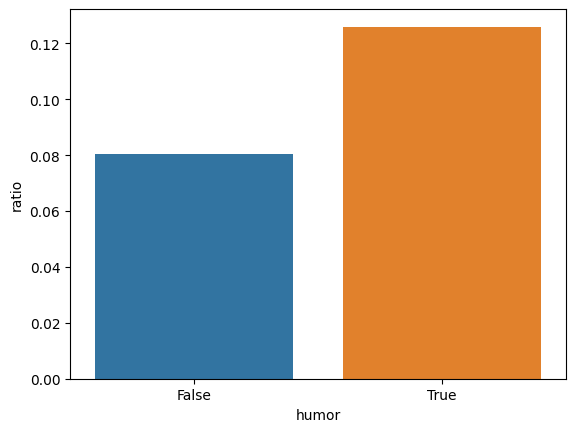

In [ ]:
df_ratio = pd.DataFrame({'humor':data.humor, 'ratio':ratio})
df_ratio_counts = pd.DataFrame({'humor':[True, False],
                                'ratio':[df_ratio[df_ratio.humor == x].ratio.mean() for x in [True, False]]})
sns.barplot(x='humor', y='ratio', data=df_ratio_counts)

__From the above plot, we can observe that the ratio of punctuations (0.12) is greater in humorous texts as compared the non-humorous texts (0.08), validating our previous observation as well.__

<Axes: xlabel='humor', ylabel='ratio'>

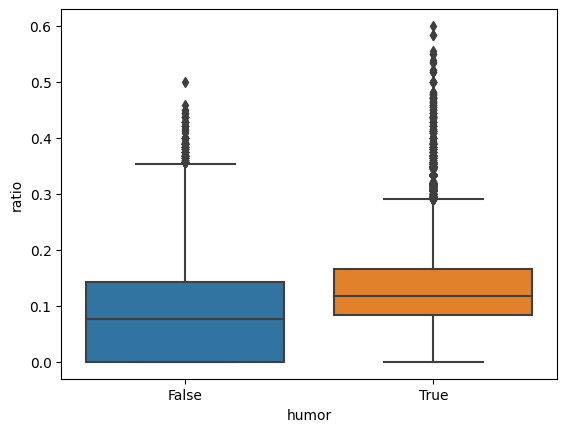

In [ ]:
sns.boxplot(data=df_ratio, x='humor', y='ratio')



__The boxplot above reveals that, on average, humorous content contains more punctuation marks compared to non-humorous content. It's worth noting that jokes often have a specific structure. A well-crafted joke is expected to be somewhat unpredictable, but it should still adhere to a recognizable structure commonly found in modern comedy. This structure typically involves a series of setups leading to a punchline. To maintain this structural order, punctuation marks are frequently used. This explains why punctuations are more prevalent in jokes.__

###Tags Ratio




In [ ]:
from spacy.matcher import Matcher
from tqdm.auto import tqdm

prpn = []
adj = []
noun = []
verb = []
length = []

prpn_pattern = [{'POS':'PROPN'}]
adj_pattern = [{'POS':'ADJ'}]
noun_pattern = [{'POS':'NOUN'}]
verb_pattern = [{'POS':'VERB'}]

matcher_propn = Matcher(nlp.vocab)
matcher_adj = Matcher(nlp.vocab)
matcher_noun = Matcher(nlp.vocab)
matcher_verb = Matcher(nlp.vocab)

matcher_propn.add(1, [prpn_pattern])
matcher_adj.add(1, [adj_pattern])
matcher_noun.add(1, [noun_pattern])
matcher_verb.add(1, [verb_pattern])

progress_bar = tqdm(range(len(data)))

for text in data['text']:
    doc = nlp(text)

    prpn.append(len(matcher_propn(doc)))
    adj.append(len(matcher_adj(doc)))
    noun.append(len(matcher_noun(doc)))
    verb.append(len(matcher_verb(doc)))
    length.append(len(doc))

    progress_bar.update(1)

  0%|          | 0/200000 [00:00<?, ?it/s]

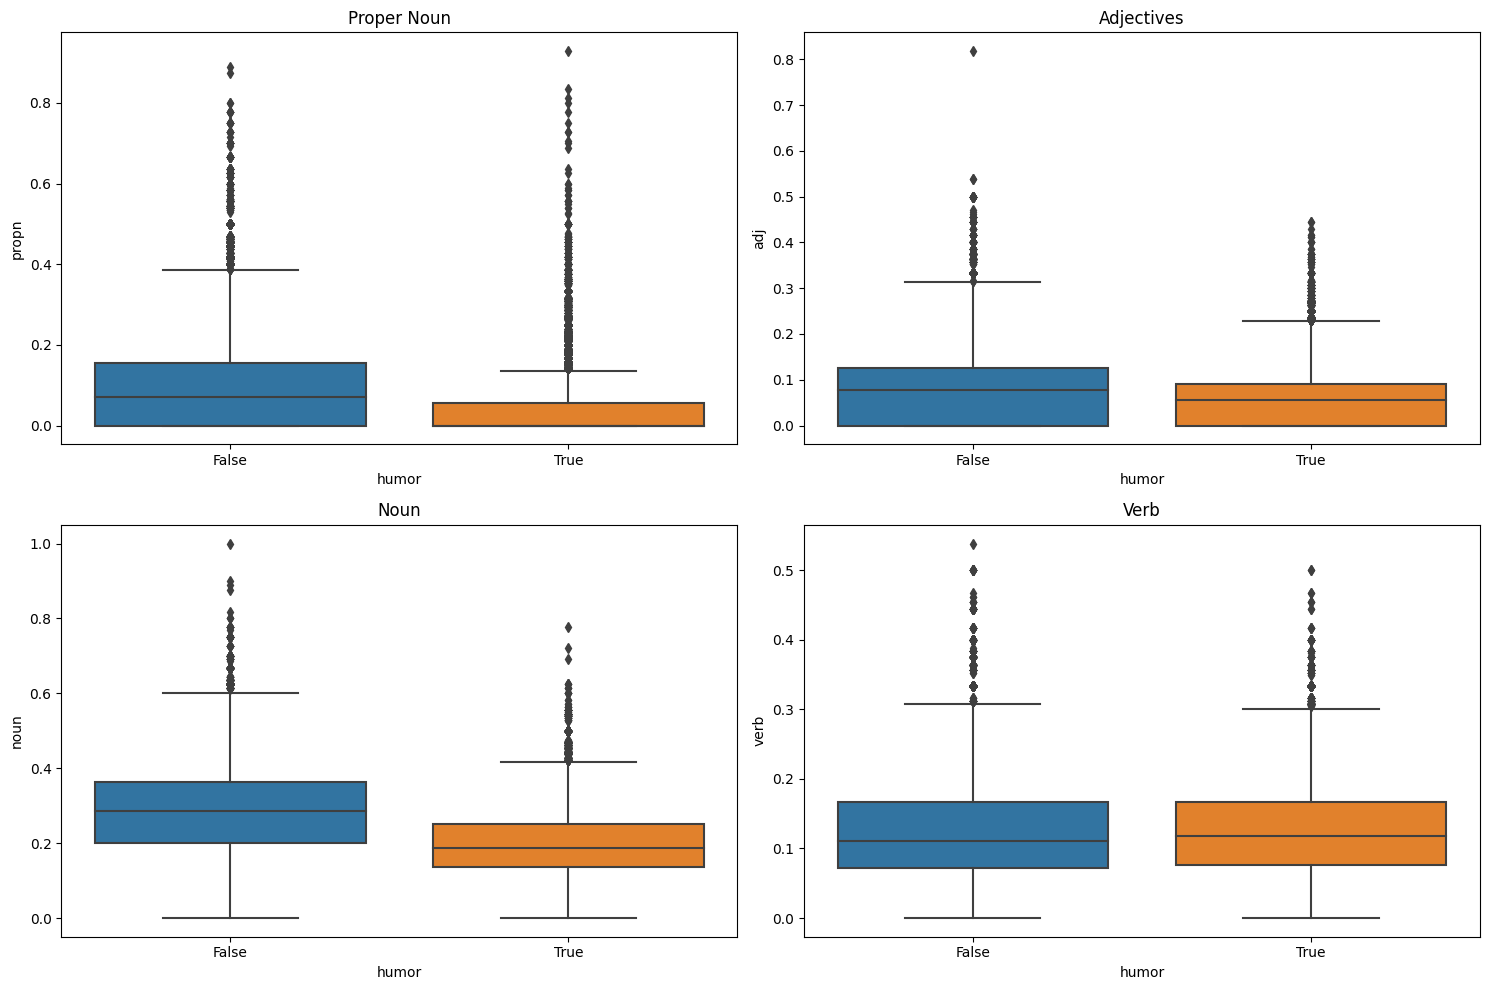

In [ ]:
df_pos = pd.DataFrame({'propn':np.array(prpn)/np.array(length),
                       'adj':np.array(adj)/np.array(length),
                       'noun':np.array(noun)/np.array(length),
                       'verb':np.array(verb)/np.array(length),
                       'length':length,
                       'humor':data.humor})
pos = ['propn', 'adj', 'noun', 'verb']
pos_count = {}
for p in pos:
    pos_count[p] = [df_pos[df_pos.humor == x][p].mean() for x in [True, False]]

df_pos_count = pd.DataFrame(pos_count)
df_pos_count['humor'] = [True, False]

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(y='propn', x='humor', data=df_pos, ax=ax[0, 0])
ax[0, 0].set_title('Proper Noun')
sns.boxplot(y='adj', x='humor', data=df_pos, ax=ax[0, 1])
ax[0, 1].set_title('Adjectives')
sns.boxplot(y='noun', x='humor', data=df_pos, ax=ax[1, 0])
ax[1, 0].set_title('Noun')
sns.boxplot(y='verb', x='humor', data=df_pos, ax=ax[1, 1])
ax[1, 1].set_title('Verb')
plt.tight_layout()



In the comparison above, we have examined the frequency of Nouns, Proper Nouns, Verbs, and Adjectives in texts with the help of boxplots. This analysis provides insights into the characteristics of jokes. <br>
__Based on the visualizations, it is evident that non-joke texts tend to contain a higher number of Proper Nouns, Adjectives, and Nouns. This suggests that non-joke texts may lean towards formality, resulting in an increased occurrence of these language elements. Consequently, we can infer that the formality of a text is associated with a greater presence of Proper Nouns, Adjectives, and Nouns.__

##Building the BERT architecture
BERT, or Bidirectional Encoder Representations from Transformers, is a leading natural language processing (NLP) model. It excels in humor detection by understanding the context and nuances of language.

In humor detection tasks, BERT is fine-tuned using labeled datasets that include humorous and non-humorous text examples. BERT's bidirectional nature enables it to recognize linguistic patterns and context that contribute to humor, making it effective at identifying humor in text, such as jokes in social media posts, funny content in scripts, or humor in chatbots.

###Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(data.text.to_list(),
                                                    data.humor.to_list(),
                                                    test_size=0.3,
                                                    random_state=33)

###Tokenizing Text

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

train_tokens = tokenizer(x_train, max_length=512, padding=True, truncation=True,
                         return_tensors='pt')

valid_tokens = tokenizer(x_valid, max_length=512, padding=True, truncation=True,
                         return_tensors='pt')

###Making Datasets & Dataloaders
Datasets and DataLoaders are functionalities provided by PyTorch, which are particularly useful for training machine learning models in batches. While PyTorch offers a range of predefined datasets, it also allows us to create custom datasets. When we opt for batch training, which involves processing multiple data points in a single iteration instead of one, we can leverage the DataLoaders feature to facilitate this process.

In [ ]:
from torch.utils.data import DataLoader, Dataset

# Now we create our own custom datasets class
class the_dataset(Dataset):
    def __init__(self, tokens, labels):
        self.input_ids = tokens.input_ids
        self.token_type_ids = tokens.token_type_ids
        self.attention_mask = tokens.attention_mask
        self.labels = [1 if x == True else 0 for x in labels]
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, x):
        return {'input_ids': self.input_ids[x],
                'token_type_ids': self.token_type_ids[x],
                'attention_mask': self.attention_mask[x],
                'labels': self.labels[x]}

# After creating datasets class, we can make new dataset by inputing the data using class
train_dataset = the_dataset(train_tokens, y_train)
valid_dataset = the_dataset(valid_tokens, y_valid)

# After we get the dataset, now we can make dataloader with a certain batch size
train_dataloader = DataLoader(train_dataset, batch_size=25, shuffle=False)
valid_dataloader = DataLoader(valid_dataset, batch_size=25, shuffle=False)

###Train
In this process, we'll create and train a model using the humor dataset we have. The chosen model is BERT, a widely used pre-trained transformer model. We'll leverage GPU for faster computations compared to CPU. Our goal is to customize this model for sequence classification by fine-tuning it.

In [ ]:
# Now we import model function for classification, AutoModelForSequenceClassification
# AdamW is a function of optimizer
# get_scheduler is a function for scheduling learning rate
from transformers import AutoModelForSequenceClassification, AdamW, get_scheduler
from tqdm.auto import tqdm

# here we determine device using the function from torch
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Epoch is the number of all data being trained
# num_training_steps is the number that we will use to make progress bar using tqdm
epochs = 1
num_training_steps = epochs * len(train_dataloader)

optimizer = AdamW(model.parameters(), lr=5e-5)
lr_scheduler = get_scheduler('linear', optimizer=optimizer, num_warmup_steps=0,
                             num_training_steps=num_training_steps)
progress_bar = tqdm(range(num_training_steps))
model.to(device)

# model.train() is executed when we want the model to have gradient
model.train()
for i in range(epochs):
    for batch in train_dataloader:
        batch = {k:v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/5600 [00:00<?, ?it/s]

###Evaluate

In [ ]:
predictions = []
labels = []
progress_bar = tqdm(range(len(valid_dataloader)))

model.eval()
for batch in valid_dataloader:
    batch = {k:v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    batch_preds = torch.argmax(outputs.logits, dim=-1).tolist()
    batch_labs = batch['labels'].tolist()
    for p, l in zip(batch_preds, batch_labs):
        predictions.append(p)
        labels.append(l)
    progress_bar.update(1)

  0%|          | 0/2400 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(predictions, labels)

In [ ]:
accuracy

0.9875166666666667

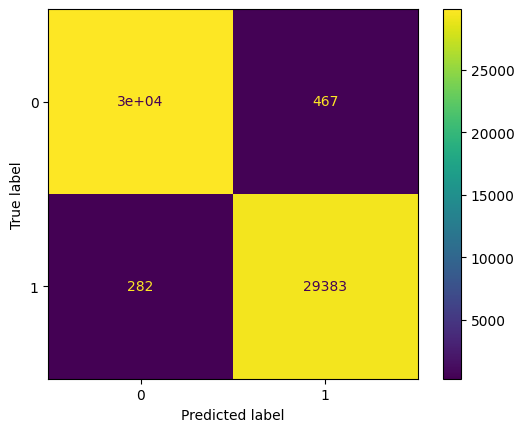

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cf = confusion_matrix(predictions, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cf,
                              display_labels=[0, 1])
disp.plot()

__We've observed that this model performs exceptionally well. However, when we analyze the confusion matrix, we notice that most of the incorrect predictions occur when the model mistakenly categorizes a non-joke as a joke. Considering that the number of such incorrect predictions is relatively low, it doesn't appear necessary to make any modifications to the model.__

##Naive Bayes Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Split the dataset into training and testing sets
X = data['text']
y = data['humor']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


  (0, 47809)	1
  (0, 6515)	1
  (0, 50769)	1
  (0, 35588)	1
  (0, 33887)	1
  (0, 27443)	1
  (0, 22726)	1
  (0, 2264)	1
  (0, 35620)	1
  (0, 49369)	1
  (0, 19831)	1
  (0, 35916)	1
  (1, 53890)	1
  (1, 14866)	1
  (1, 55124)	1
  (1, 8138)	1
  (1, 26147)	1
  (1, 54040)	1
  (1, 28971)	1
  (1, 46226)	1
  (1, 36360)	1
  (2, 34349)	1
  (2, 29561)	1
  (2, 25950)	1
  (2, 30935)	1
  :	:
  (159997, 14525)	1
  (159997, 47816)	1
  (159997, 21855)	1
  (159997, 2283)	1
  (159997, 1992)	1
  (159997, 45315)	1
  (159998, 19823)	1
  (159998, 24201)	1
  (159998, 11811)	1
  (159998, 31112)	1
  (159998, 51431)	1
  (159998, 41196)	1
  (159998, 13020)	1
  (159998, 46505)	1
  (159998, 33051)	1
  (159999, 49369)	1
  (159999, 44617)	1
  (159999, 49961)	3
  (159999, 46013)	1
  (159999, 15441)	1
  (159999, 14189)	1
  (159999, 53376)	1
  (159999, 7912)	1
  (159999, 21816)	1
  (159999, 4181)	1
  (0, 5622)	1
  (0, 25866)	1
  (0, 25883)	1
  (0, 37687)	1
  (0, 46561)	1
  (0, 49125)	1
  (0, 49369)	1
  (0, 49814)	1
  (0, 4

In [ ]:
# Create and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:

# Make predictions
y_pred = nb_classifier.predict(X_test_vec)

###Evaluation

In [ ]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)

Accuracy: 0.920225
              precision    recall  f1-score   support

       False       0.94      0.90      0.92     20001
        True       0.90      0.94      0.92     19999

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000



__From the above evaluation metrics table, we observe that the performance of the Naiive Bayes classifier is reasonably well (with 92% accuracy), although, not surpassing the BERT model.__

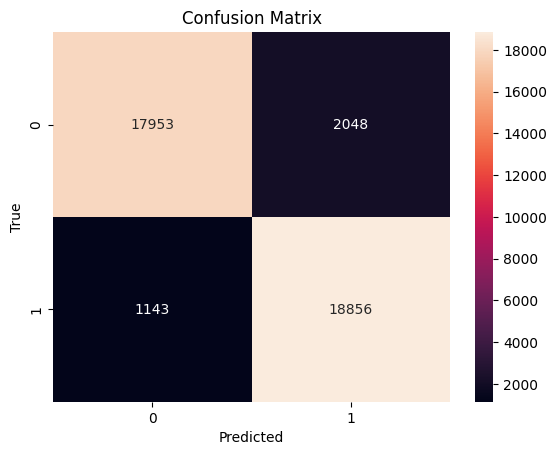

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


__Upon analyzing the confusion matrix, we notice that most of the incorrect predictions occur when the model mistakenly categorizes a non-joke as a joke. The number of such incorrect predictions is relatively more than the BERT model.__


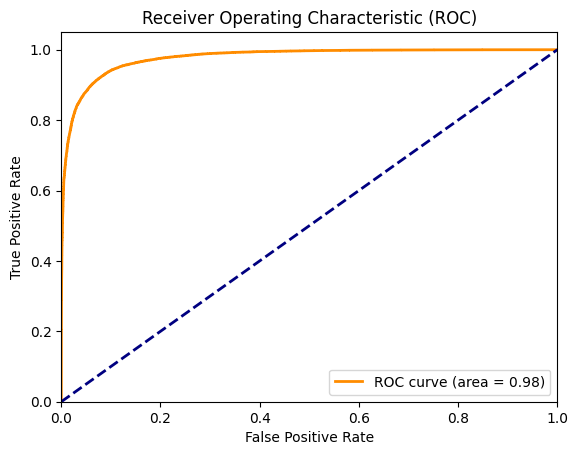

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, nb_classifier.predict_proba(X_test_vec)[:, 1])
roc_auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test_vec)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

__The ROC (Receiver Operating Characteristic) curve with an area under the curve (AUC) of 0.98 is an indication of a highly accurate binary classification model. The ROC curve is a graphical representation of the trade-off between a model's true positive rate (sensitivity) and its false positive rate (1-specificity) across different classification thresholds.__

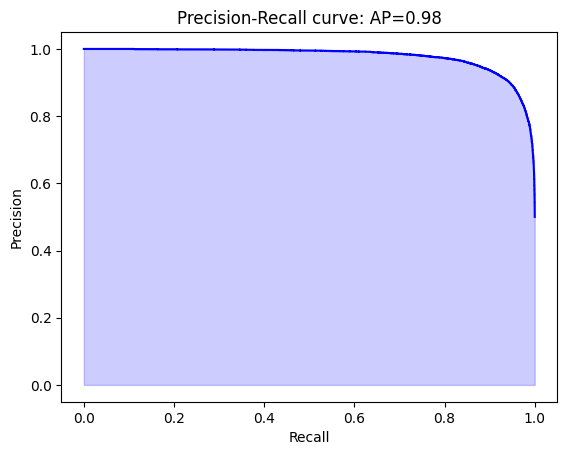

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, nb_classifier.predict_proba(X_test_vec)[:, 1])
avg_precision = average_precision_score(y_test, nb_classifier.predict_proba(X_test_vec)[:, 1])

plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve: AP={avg_precision:.2f}')
plt.show()

##Random Forest

In [ ]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:

# Vectorize the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

###Evaluation

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(report)

Accuracy: 0.917425
              precision    recall  f1-score   support

       False       0.94      0.90      0.92     20001
        True       0.90      0.94      0.92     19999

    accuracy                           0.92     40000
   macro avg       0.92      0.92      0.92     40000
weighted avg       0.92      0.92      0.92     40000



__On observing the Random Forest evaluation metrics, we can see and infer that although its accuracy is significant (91.7%), it is still lower than the Naiive Bayes Model. Therefore, we can conclude that the BERT pre-trained model is more effective than the Naiive Baye's and Random Forest classifier models.__

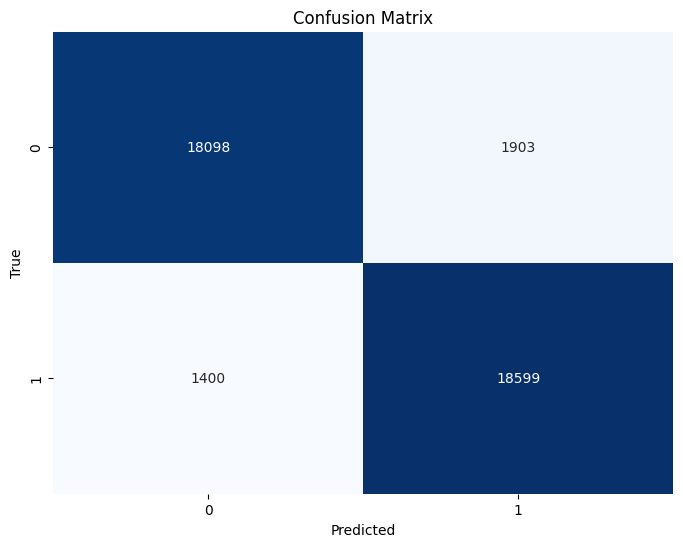

In [ ]:

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

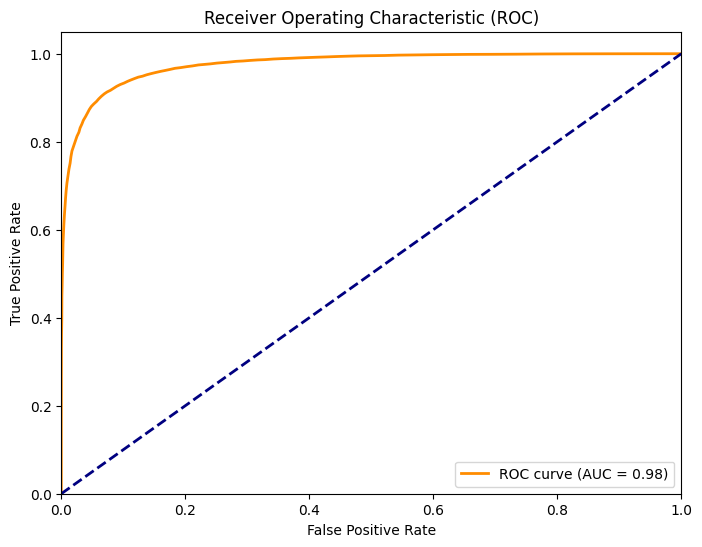

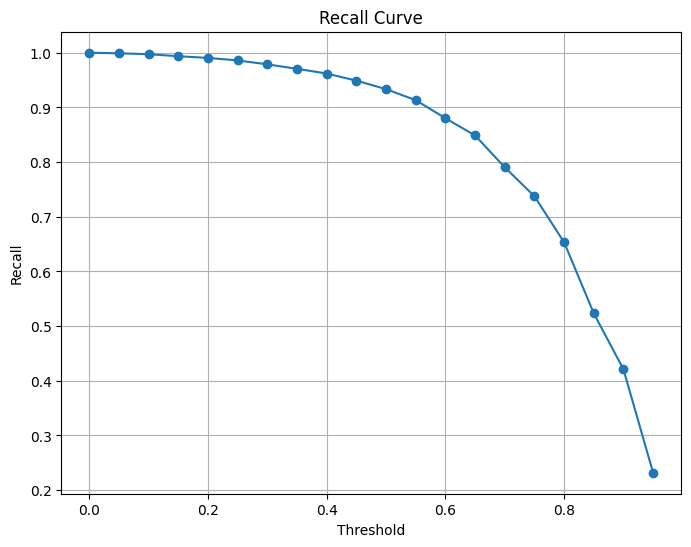

In [ ]:
from sklearn.metrics import roc_curve, auc, recall_score

# ... (your existing code)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test_tfidf)[:, 1])

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Calculate Recall for different thresholds
thresholds = np.arange(0, 1, 0.05)
recalls = []

for threshold in thresholds:
    y_pred_thresholded = [1 if score >= threshold else 0 for score in classifier.predict_proba(X_test_tfidf)[:, 1]]
    recalls.append(recall_score(y_test, y_pred_thresholded))

# Create a Recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(thresholds, recalls, marker='o', linestyle='-')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall Curve')
plt.grid(True)
plt.show()

#Conlusion
__The field of natural language processing (NLP) is currently dominated by the Transformer architecture, which is evident by our research via implementing the BERT model and comparing it with the other Supervised ML techniques. And this trend is expected to continue for several years. As demonstrated in this study, we've showcased the effectiveness of this approach. With a relatively short training time, we were able to achieve excellent model performance via the BERT pre-trained language model. In the realm of humour detection, we customized the BERT model and fine-tuned it for our specific task, which, in this instance, involves classifying text as either a joke or not.__